# **Часть 1**

## 1. Загрузка и исследование данных:

In [ ]:
from tensorflow.keras.datasets import fashion_mnist


(x_train, _), (x_test, _) = fashion_mnist.load_data()

x_train = x_train.astype("float32") / 255.0
x_test = x_test.astype("float32") / 255.0

print("Train shape:", x_train.shape)
print("Test shape:", x_test.shape)

Train shape: (60000, 28, 28)
Test shape: (10000, 28, 28)


## 2. Создание автокодировщика

In [ ]:
import tensorflow as tf
from tensorflow.keras import layers, models


input_shape = (28, 28)
latent_dim = 64

#входной слой
input_img = tf.keras.Input(shape=input_shape)
x = layers.Flatten()(input_img)

#кодировщик
x = layers.Flatten()(input_img)
x = layers.Dense(128, activation='relu')(x)
encoded = layers.Dense(latent_dim, activation='relu')(x)

#декодировщик
x = layers.Dense(128, activation='relu')(encoded)
x = layers.Dense(784, activation='sigmoid')(x)
decoded = layers.Reshape(input_shape)(x)


autoencoder = models.Model(inputs=input_img, outputs=decoded)
autoencoder.compile(optimizer='adam', loss='binary_crossentropy')
autoencoder.summary()

Model: "functional_5"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ input_layer_5 (InputLayer)      │ (None, 28, 28)         │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_6 (Flatten)             │ (None, 784)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_24 (Dense)                │ (None, 128)            │       100,480 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_25 (Dense)                │ (None, 64)             │         8,256 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_26 (Dense)                │ (None, 128)            │         8,320 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_27 (Dense)                │ (None, 784)            │       101,136 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ reshape_3 (Reshape)             │ (None, 28, 28)         │             0 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 218,192 (852.31 KB)

 Trainable params: 218,192 (852.31 KB)

 Non-trainable params: 0 (0.00 B)

## 3. Обучение автокодировщика

In [ ]:
history = autoencoder.fit(
    x_train, x_train,
    epochs=20,
    batch_size=128,
    shuffle=True,
    validation_data=(x_test, x_test)
)

Epoch 1/20
469/469 ━━━━━━━━━━━━━━━━━━━━ 5s 11ms/step - loss: 0.2778 - val_loss: 0.2787
Epoch 2/20
469/469 ━━━━━━━━━━━━━━━━━━━━ 10s 11ms/step - loss: 0.2765 - val_loss: 0.2776
Epoch 3/20
469/469 ━━━━━━━━━━━━━━━━━━━━ 10s 11ms/step - loss: 0.2747 - val_loss: 0.2767
Epoch 4/20
469/469 ━━━━━━━━━━━━━━━━━━━━ 6s 13ms/step - loss: 0.2743 - val_loss: 0.2759
Epoch 5/20
469/469 ━━━━━━━━━━━━━━━━━━━━ 5s 11ms/step - loss: 0.2735 - val_loss: 0.2750
Epoch 6/20
469/469 ━━━━━━━━━━━━━━━━━━━━ 11s 12ms/step - loss: 0.2724 - val_loss: 0.2744
Epoch 7/20
469/469 ━━━━━━━━━━━━━━━━━━━━ 5s 10ms/step - loss: 0.2721 - val_loss: 0.2737
Epoch 8/20
469/469 ━━━━━━━━━━━━━━━━━━━━ 6s 13ms/step - loss: 0.2716 - val_loss: 0.2732
Epoch 9/20
469/469 ━━━━━━━━━━━━━━━━━━━━ 5s 11ms/step - loss: 0.2710 - val_loss: 0.2730
Epoch 10/20
469/469 ━━━━━━━━━━━━━━━━━━━━ 6s 13ms/step - loss: 0.2699 - val_loss: 0.2733
Epoch 11/20
469/469 ━━━━━━━━━━━━━━━━━━━━ 9s 11ms/step - loss: 0.2700 - val_loss: 0.2723
Epoch 12/20
469/469 ━━━━━━━━━━━━━━━━━━

In [ ]:
import numpy as np


reconstruction_error = np.mean(np.abs(x_test - autoencoder.predict(x_test)))
print(f"Средняя ошибка восстановления (MAE): {reconstruction_error:.4f}")

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step
Средняя ошибка восстановления (MAE): 0.0478


## 4. Визуализация

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 82ms/step


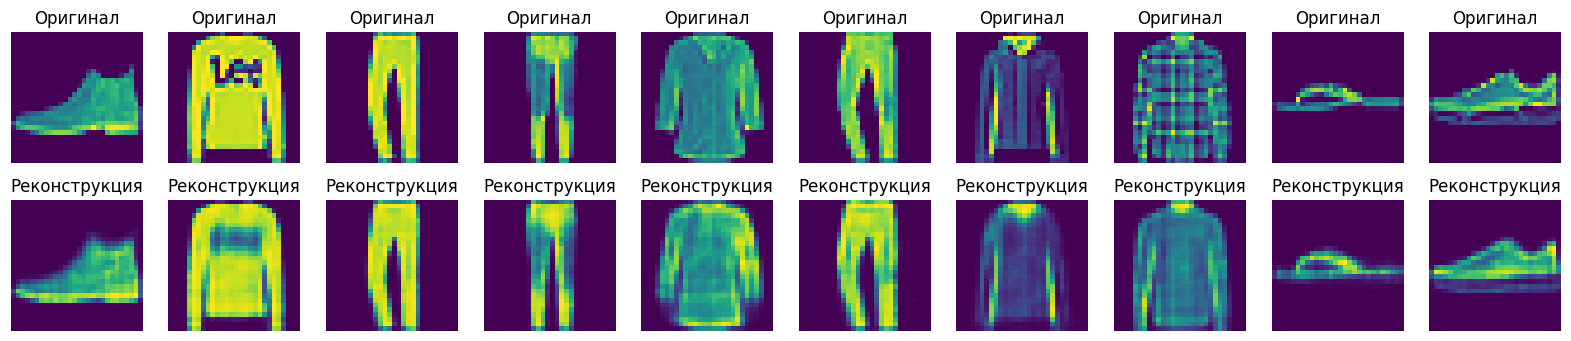

In [ ]:
import matplotlib.pyplot as plt


decoded_imgs = autoencoder.predict(x_test[:10])

n = 10
plt.figure(figsize=(20, 4))
for i in range(n):
    #оригинал
    ax = plt.subplot(2, n, i + 1)
    plt.imshow(x_test[i])
    plt.title("Оригинал")
    plt.axis("off")

    #реконструкция
    ax = plt.subplot(2, n, i + 1 + n)
    plt.imshow(decoded_imgs[i])
    plt.title("Реконструкция")
    plt.axis("off")
plt.show()


In [ ]:
from tensorflow.keras import Model


encoder = Model(inputs=autoencoder.input, outputs=autoencoder.get_layer("dense_25").output)
encoded_imgs = encoder.predict(x_test)

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step


## *PCA*

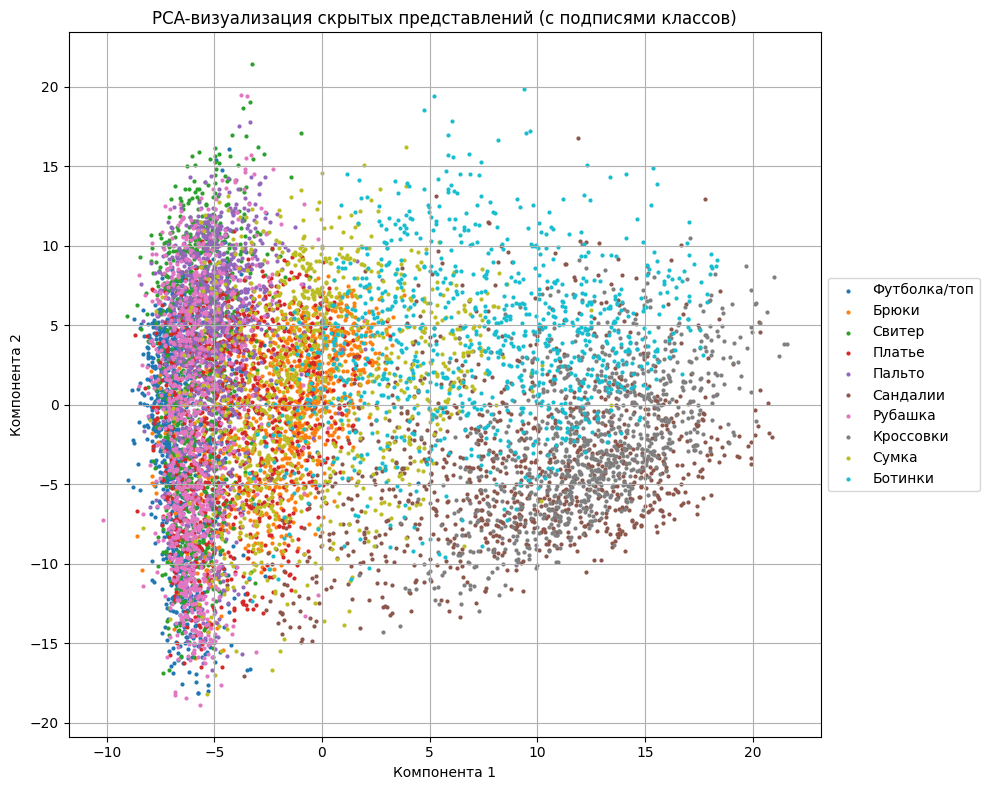

In [ ]:
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt

pca = PCA(n_components=2)
encoded_2d = pca.fit_transform(encoded_imgs)

class_labels = [
    "Футболка/топ", "Брюки", "Свитер", "Платье", "Пальто",
    "Сандалии", "Рубашка", "Кроссовки", "Сумка", "Ботинки"
]

(_, _), (_, y_test) = tf.keras.datasets.fashion_mnist.load_data()


plt.figure(figsize=(10, 8))

for class_index in range(10):
    indices = y_test == class_index
    plt.scatter(
        encoded_2d[indices, 0],
        encoded_2d[indices, 1],
        s=4,
        label=class_labels[class_index]
    )

plt.title("PCA-визуализация скрытых представлений (с подписями классов)")
plt.xlabel("Компонента 1")
plt.ylabel("Компонента 2")
plt.legend(loc='center left', bbox_to_anchor=(1, 0.5))
plt.grid(True)
plt.tight_layout()
plt.show()

## *UMAP*

/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/umap/umap_.py:1952: UserWarning: n_jobs value 1 overridden to 1 by setting random_state. Use no seed for parallelism.
  warn(


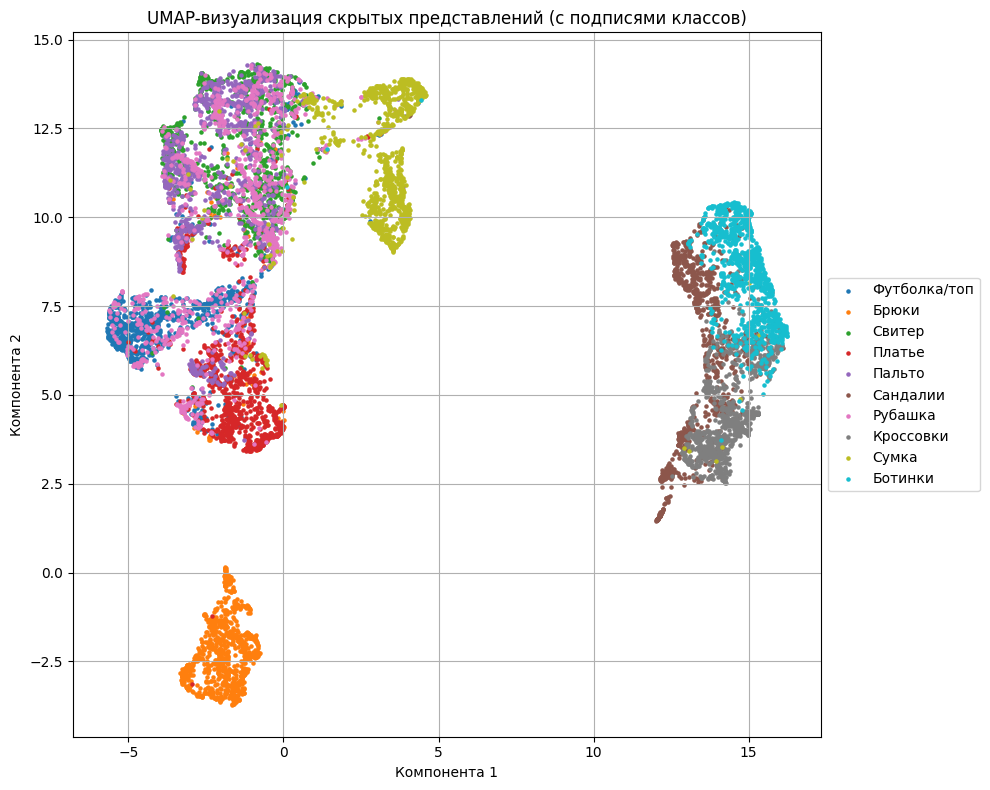

In [ ]:
!pip install umap-learn


import umap
import matplotlib.pyplot as plt


reducer = umap.UMAP(n_components=2, random_state=42)
encoded_umap = reducer.fit_transform(encoded_imgs)

class_labels = [
    "Футболка/топ", "Брюки", "Свитер", "Платье", "Пальто",
    "Сандалии", "Рубашка", "Кроссовки", "Сумка", "Ботинки"
]


plt.figure(figsize=(10, 8))
for class_index in range(10):
    indices = y_test == class_index
    plt.scatter(
        encoded_umap[indices, 0],
        encoded_umap[indices, 1],
        s=5,
        label=class_labels[class_index]
    )

plt.title("UMAP-визуализация скрытых представлений (с подписями классов)")
plt.xlabel("Компонента 1")
plt.ylabel("Компонента 2")
plt.legend(loc='center left', bbox_to_anchor=(1, 0.5))
plt.grid(True)
plt.tight_layout()
plt.show()

## 5. Эксперимент

In [ ]:
import numpy as np
from tensorflow.keras import layers, models
from sklearn.metrics import mean_absolute_error

latent_dims = [2, 8, 16, 32, 64, 128, 256]
mae_results = []

for latent_dim in latent_dims:
    input_img = layers.Input(shape=(28, 28))
    #кодировщик
    x = layers.Flatten()(input_img)
    x = layers.Dense(128, activation='relu')(x)
    encoded = layers.Dense(latent_dim, activation='relu')(x)
    #декодировщик
    x = layers.Dense(128, activation='relu')(encoded)
    x = layers.Dense(784, activation='sigmoid')(x)
    decoded = layers.Reshape((28, 28))(x)

    autoencoder = models.Model(input_img, decoded)
    autoencoder.compile(optimizer='adam', loss='binary_crossentropy')

    autoencoder.fit(
        x_train, x_train,
        epochs=20,
        batch_size=128,
        shuffle=True,
        verbose=0,
        validation_data=(x_test, x_test)
    )


    reconstructed = autoencoder.predict(x_test)
    mae = mean_absolute_error(x_test.reshape(-1, 784), reconstructed.reshape(-1, 784))
    mae_results.append(mae)

    print(f"latent_dim = {latent_dim}: MAE = {mae:.4f}")


313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step
latent_dim = 2: MAE = 0.1008
313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step
latent_dim = 8: MAE = 0.0659
313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step
latent_dim = 16: MAE = 0.0593
313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step
latent_dim = 32: MAE = 0.0534
313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step
latent_dim = 64: MAE = 0.0496
313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step
latent_dim = 128: MAE = 0.0466
313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step
latent_dim = 256: MAE = 0.0440


# **Часть 2**

## 1. Подготовка данных

In [ ]:
import tensorflow as tf
import numpy as np

text = (
    "машина ехала по дороге. солнце светило ярко. "
    "вдоль обочины шли люди. небо было голубое. "
    "день был тёплым и тихим. ветер едва колыхал деревья."
)
print(f"Длина текста: {len(text)} символов")


chars = sorted(set(text))
char2idx = {c: i for i, c in enumerate(chars)}
idx2char = {i: c for c, i in char2idx.items()}


text_as_int = np.array([char2idx[c] for c in text])
vocab_size = len(chars)
print(f"Размер словаря: {vocab_size}")


seq_length = 10
examples_per_epoch = len(text) - seq_length


char_dataset = tf.data.Dataset.from_tensor_slices(text_as_int)


sequences = char_dataset.batch(seq_length + 1, drop_remainder=True)

def split_input_target(chunk):
    return chunk[:-1], chunk[1:]

dataset = sequences.map(split_input_target)

Длина текста: 140 символов
Размер словаря: 28


In [ ]:
BATCH_SIZE = 4
BUFFER_SIZE = 100


dataset = (
    dataset.shuffle(BUFFER_SIZE)
    .batch(BATCH_SIZE, drop_remainder=True)
)

## 2. Реализация реккурентной сети

In [ ]:
from tensorflow.keras import layers, models

embedding_dim = 64
rnn_units = 128

model = models.Sequential([
    layers.Embedding(input_dim=vocab_size, output_dim=embedding_dim),
    layers.SimpleRNN(rnn_units, return_sequences=True),
    layers.Dense(vocab_size)
])

model.summary()


Model: "sequential_33"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ embedding_36 (Embedding)        │ ?                      │   0 (unbuilt) │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ simple_rnn_14 (SimpleRNN)       │ ?                      │   0 (unbuilt) │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_125 (Dense)               │ ?                      │   0 (unbuilt) │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 0 (0.00 B)

 Trainable params: 0 (0.00 B)

 Non-trainable params: 0 (0.00 B)

In [ ]:
def loss(labels, logits):
    return tf.keras.losses.sparse_categorical_crossentropy(labels, logits, from_logits=True)

model.compile(optimizer='adam', loss=loss)

In [ ]:
EPOCHS = 20

history = model.fit(dataset, epochs=EPOCHS)

Epoch 1/20
3/3 ━━━━━━━━━━━━━━━━━━━━ 3s 7ms/step - loss: 3.3473
Epoch 2/20
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 3.2771 
Epoch 3/20
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 3.2165 
Epoch 4/20
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 3.1259 
Epoch 5/20
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 3.0145 
Epoch 6/20
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 2.9591 
Epoch 7/20
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 2.8944 
Epoch 8/20
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 2.7600 
Epoch 9/20
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 2.6745 
Epoch 10/20
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 2.5694 
Epoch 11/20
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 2.4244 
Epoch 12/20
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 2.3758 
Epoch 13/20
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 2.2151 
Epoch 14/20
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 2.1233 
Epoch 15/20
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 1.9693 
Epoch 16/20
3/3 ━━━━━━━━━━━━━━━━━━━

## 3. Расширение модели

In [125]:
from tensorflow.keras import layers, models
from sklearn.metrics import accuracy_score
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Dense, Softmax
import numpy as np


embedding_dim = 64
rnn_units = 128
EPOCHS = 50
BATCH_SIZE = 4


results = {}

def build_and_train(model_type):
    if model_type == 'SimpleRNN':
        rnn_layer = layers.SimpleRNN(rnn_units, return_sequences=True)
    elif model_type == 'LSTM':
        rnn_layer = layers.LSTM(rnn_units, return_sequences=True)
    elif model_type == 'GRU':
        rnn_layer = layers.GRU(rnn_units, return_sequences=True)

    model = models.Sequential([
        layers.Embedding(input_dim=vocab_size, output_dim=embedding_dim),
        rnn_layer,
        layers.Dense(vocab_size, activation='softmax')
    ])

    model.compile(
        optimizer='adam',
        loss='sparse_categorical_crossentropy',
        metrics=['accuracy']
    )

    print(f"\nОбучение модели: {model_type}")
    history = model.fit(dataset, epochs=EPOCHS, verbose=0)

    print(f"Финальный loss: {history.history['loss'][-1]:.4f}")
    print(f"Финальная accuracy: {history.history['accuracy'][-1]:.4f}")

    return model, history


In [126]:
models_dict = {}
histories = {}

for rnn_type in ['SimpleRNN', 'LSTM', 'GRU']:
    model, history = build_and_train(rnn_type)
    models_dict[rnn_type] = model
    histories[rnn_type] = history


Обучение модели: SimpleRNN
Финальный loss: 0.3611
Финальная accuracy: 0.9667

Обучение модели: LSTM
Финальный loss: 1.5107
Финальная accuracy: 0.5833

Обучение модели: GRU
Финальный loss: 0.8484
Финальная accuracy: 0.8417


In [ ]:
print(history.history.keys())

dict_keys(['loss'])


## 4. Визуализация

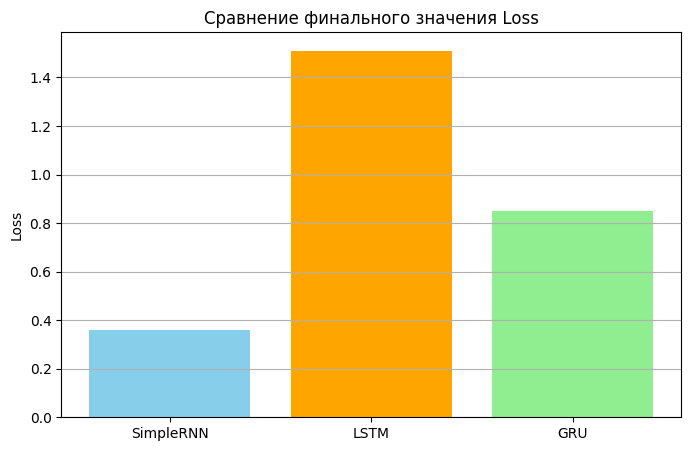

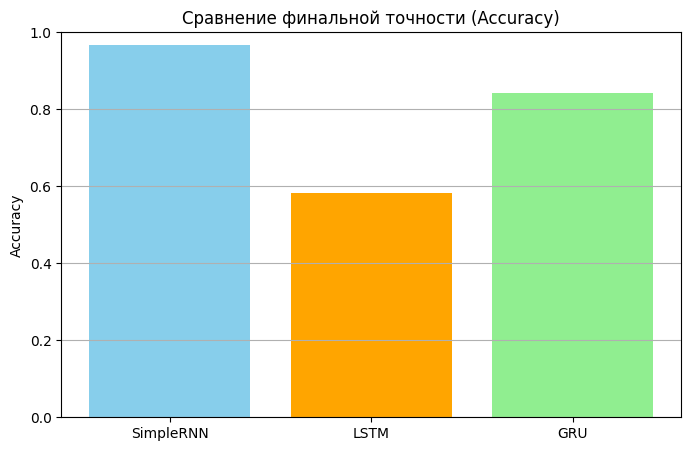

In [127]:
import matplotlib.pyplot as plt


loss_values = {
    'SimpleRNN': 0.3611,
    'LSTM': 1.5107,
    'GRU': 0.8484
}

accuracy_values = {
    'SimpleRNN': 0.9667,
    'LSTM': 0.5833,
    'GRU': 0.8417
}


plt.figure(figsize=(8, 5))
plt.bar(loss_values.keys(), loss_values.values(), color=['skyblue', 'orange', 'lightgreen'])
plt.title("Сравнение финального значения Loss")
plt.ylabel("Loss")
plt.grid(axis='y')
plt.show()



plt.figure(figsize=(8, 5))
plt.bar(accuracy_values.keys(), accuracy_values.values(), color=['skyblue', 'orange', 'lightgreen'])
plt.title("Сравнение финальной точности (Accuracy)")
plt.ylabel("Accuracy")
plt.ylim(0, 1)
plt.grid(axis='y')
plt.show()

In [128]:
def generate_text(model, start_string, char2idx, idx2char, num_generate=100):
    input_indices = [char2idx[c] for c in start_string]
    input_tensor = tf.expand_dims(input_indices, 0)

    generated = []

    for _ in range(num_generate):
        predictions = model(input_tensor)
        predictions = predictions[:, -1, :]
        predicted_id = tf.random.categorical(predictions, num_samples=1)[0, 0].numpy()


        input_tensor = tf.concat([input_tensor, tf.expand_dims([predicted_id], 0)], axis=1)
        generated.append(idx2char[predicted_id])

    return start_string + ''.join(generated)


In [129]:
print("SimpleRNN:")
print(generate_text(models_dict['SimpleRNN'], "начало ", char2idx, idx2char))

print("\nLSTM:")
print(generate_text(models_dict['LSTM'], "начало ", char2idx, idx2char))

print("\nGRU:")
print(generate_text(models_dict['GRU'], "начало ", char2idx, idx2char))

SimpleRNN:
начало уюышс   .ягчмцддю.шуугцютгцпшухюнхчнеххягтьчбгехюц.сгр.ик.хуыплюлотгчёицд.ымеахкквчпюлшыёою гтоцшхав

LSTM:
начало дюгсюг шдсгмсхлнг.. аришювюё.тапи.х ммнр явымшкарвяпаглгхыктегнуявбаб ёа яы внпвпга.мюиьспюмснраеьле

GRU:
начало дилуочипрбёшбпдувнюас шипвтьрицуёгвмрл втепр нрпг.хвхятцдювёррбармрыацлпчмьекдвчлмцлчкличссёхибски л
